# Import libraries

In [27]:
import pydyno
import numpy as np
from os.path import dirname, join
from IPython.display import Image
from pydyno.examples.double_enzymatic.mm_two_paths_model import model
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.discretization import PysbDomPath
from pydyno.visualize_discretization import visualization_path
from pysb.simulator import ScipyOdeSimulator
%matplotlib inline

# Load the calibrated parameters and simulate the model with 100 different parameter sets

In [5]:
# import calibrated parameters
module_path = dirname(pydyno.__file__)
pars_path = join(module_path, "examples", "double_enzymatic", "calibrated_pars.npy")
pars = np.load(pars_path)

In [10]:
# define time for the simulation and simulate model
tspan = np.linspace(0, 100, 101)
sim = ScipyOdeSimulator(model, tspan=tspan).run(param_values=pars[:100])

2021-04-20 13:11:43.445 - pysb.simulator.scipyode - WARNING - [pydyno.examples.double_enzymatic.mm_two_paths_model] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing a package for compiling the ODEs to C code: 'weave' (recommended for Python 2) or 'cython' (recommended for Python 3). This warning can be suppressed by specifying compiler='python'.


In [11]:
vt = VisualizeSimulations(model, sim, clusters=None)

{'comp0_cluster0': (<Figure size 432x288 with 1 Axes>,
  <AxesSubplot:xlabel='Time', ylabel='Concentration'>)}

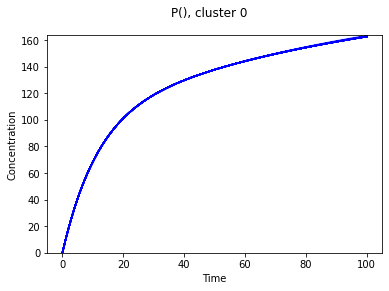

In [15]:
vt.plot_cluster_dynamics(components=[5])

# Obtain the dominant paths for each of the simulations¶


In [18]:
dp = PysbDomPath(model, sim)
signatures, paths = dp.get_path_signatures('s5', 'production', 
                                           depth=2, dom_om=1)

 99%|█████████▉| 99/100 [00:06<00:00, 15.10it/s]

In [22]:
signatures.sequences.head()

,,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
seq_idx,count,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Obtain distance matrix and optimal number of clusters (execution modes)

In [24]:
signatures.dissimilarity_matrix()
signatures.silhouette_score_agglomerative_range(4)

,num_clusters,cluster_silhouette
0,2,0.995133
1,3,0.973921
2,4,0.975000


In [25]:
# Selec the number of cluster with highest silhouette score
signatures.agglomerative_clustering(2)

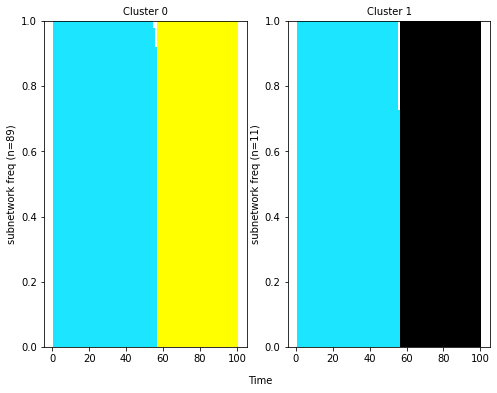

In [26]:
# Plot signatures
signatures.plot_sequences()

In [28]:
paths

{2: [OrderedDict([('s5', [['s3'], ['s4']])]),
  OrderedDict([('s3', [['s0', 's1']]), ('s4', [['s0', 's2']])])],
 1: [OrderedDict([('s5', [['s4']])]), OrderedDict([('s4', [['s0', 's2']])])],
 0: [OrderedDict([('s5', [['s3']])]), OrderedDict([('s3', [['s0', 's1']])])]}

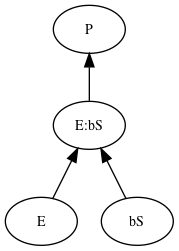

In [41]:
path_label = 1
visualization_path(model, 
                   path=paths[path_label], 
                   target_node='s5', 
                   type_analysis='production', 
                   filename=f'path_{path_label}.png')
Image(filename=f'path_{path_label}.png')

In [37]:
visualization_path(model, 
                   path=paths[0], 
                   target_node='s5', 
                   type_analysis='production', 
                   filename='path_0.png')